In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("multiplegradesdataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [5]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [6]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

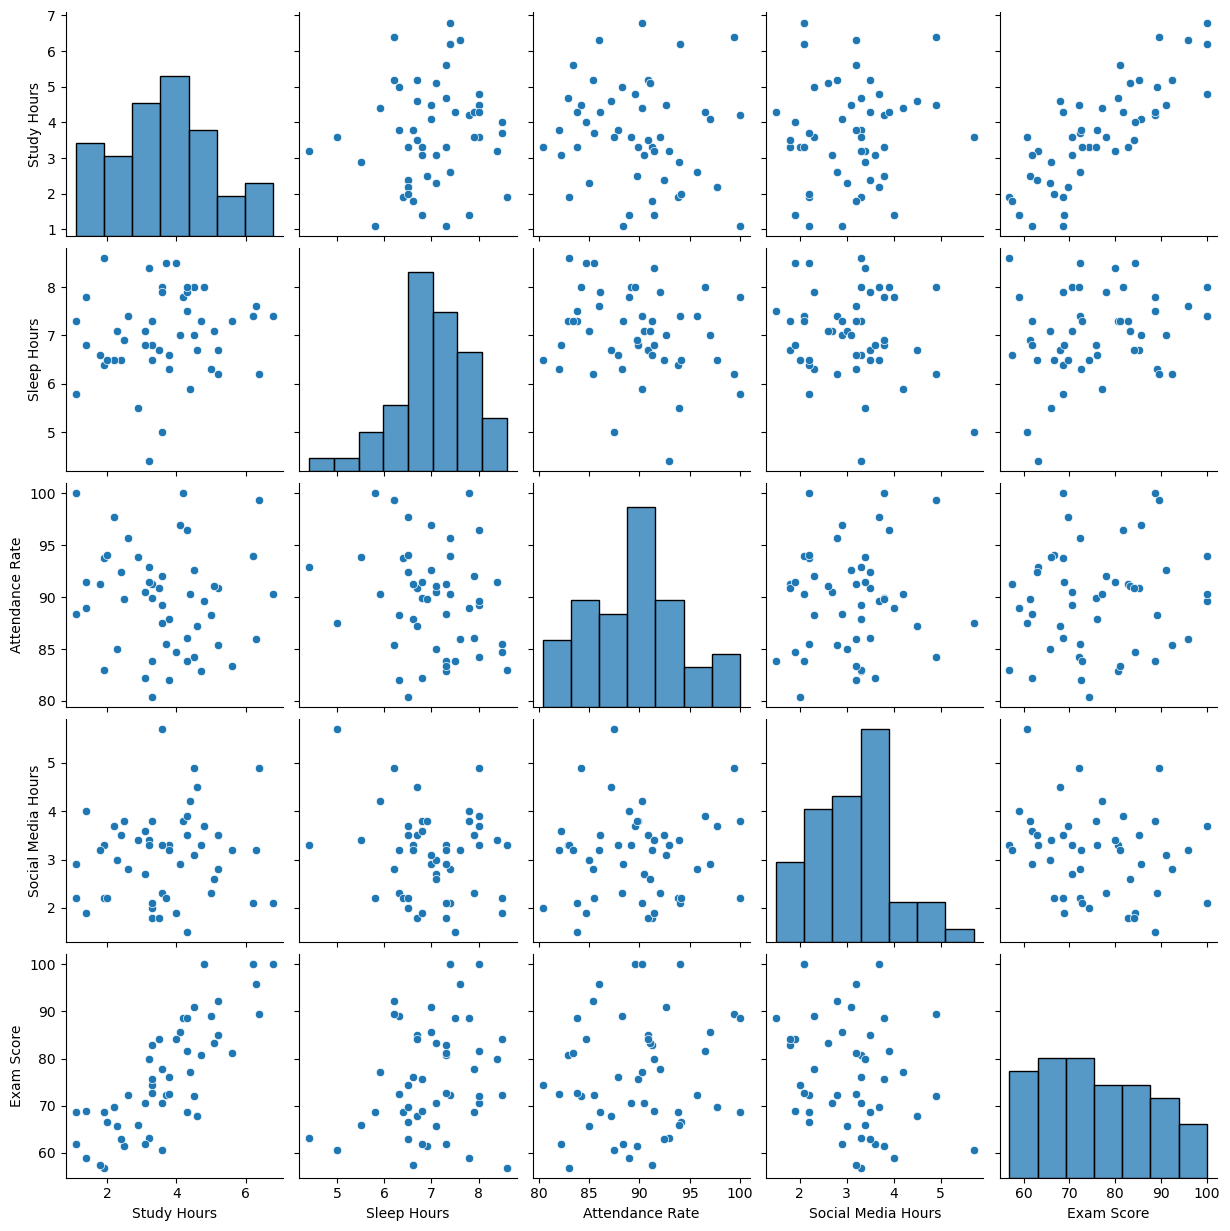

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


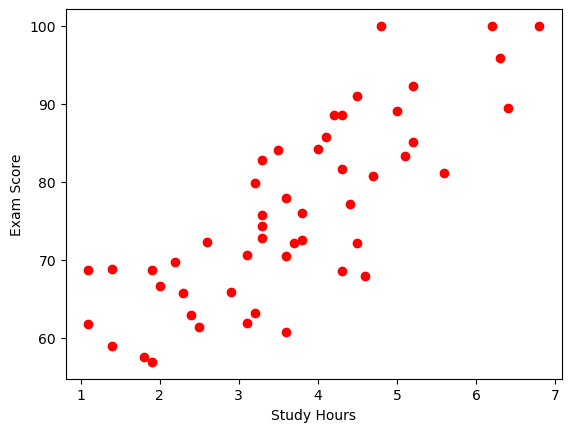

In [9]:
plt.scatter(df['Study Hours'],df['Exam Score'],color='r')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

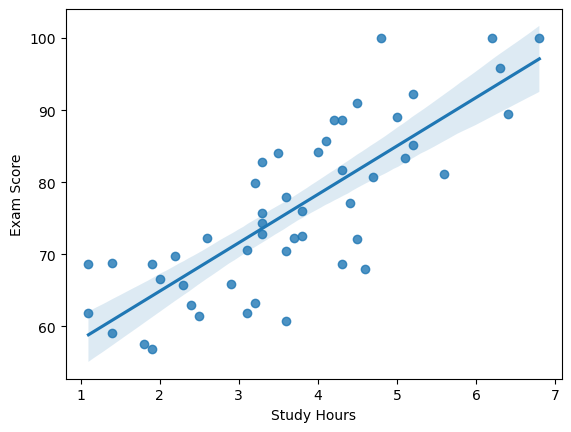

In [10]:
sns.regplot(x=df['Study Hours'],y=df['Exam Score'])
plt.show()

In [11]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [12]:
##independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

#X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
#y = df["Exam Score"]

In [13]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [14]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
X_test[0]

array([-1.93308583, -1.42206859,  2.26972006, -1.02040033])

In [37]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [38]:
new_student = [[5,7,90,2]]

In [39]:
new_student_scaled = scaler.transform(new_student)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
regression.predict(new_student_scaled)

array([89.90613009])

In [41]:
y_pred = regression.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("mse: ",mse)
print("mae: ",mae)


mse:  14.840108358882313
mae:  3.338458010436359


In [45]:
score = r2_score(y_test, y_pred)
score

0.8549634217448542

In [46]:
residuals = y_test - y_pred

In [47]:
print(residuals)

13    4.043683
39    4.382182
30   -2.844409
45   -2.760770
17   -0.495902
48    7.783756
26    2.128620
25    4.880481
32    1.621194
19    0.819572
12    2.334158
4    -5.115872
37    4.189355
Name: Exam Score, dtype: float64


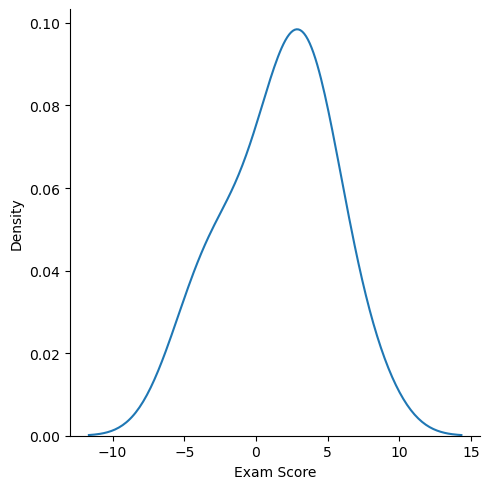

In [50]:
sns.displot(residuals, kind="kde")
plt.show()

In [51]:
regression.intercept_

np.float64(76.72162162162164)

In [52]:
regression.coef_

array([10.16883216,  1.42717312,  2.60099488, -3.6435975 ])

In [53]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3
